# Practica 2
## Alejandro Jiménez y Diego Rodríguez
## Grupo 1463

In [17]:
from abc import ABCMeta,abstractmethod
import pandas as pd
import numpy as np
from Datos import *
from EstrategiaParticionado import *
from Clasificador import *
from Distancia import *
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pandas as pd

## APARTADO 1 - KNN

In [9]:
wdbc = Datos('./ConjuntoDatos/wdbc.csv')
diabetes = Datos('./ConjuntoDatos/pima-indians-diabetes.csv')
vs = ValidacionSimple(0.30, 2)

datasets = [('diabetes', diabetes), ('wdbc', wdbc)]

distancias = []
de = DistanciaEuclidea()
dt = DistanciaManhattan()
dm = DistanciaMahalanobis()
distancias.append(de)
distancias.append(dt)
distancias.append(dm)
# Vecinos a utilizar
vecinos = [1, 3, 5, 11, 21]
# Normalizacion
normalizar = [True, False]

for d in datasets:
    t = PrettyTable()
    t.add_row([" ", " ", " ", " ", " ", " ", " ", d[0]])
    t.add_row(["Vecinos", " ", str(distancias[0]), " ", str(distancias[1]), " ", str(distancias[2]), " "])
    t.add_row([" ", " ", "Normalizado", " ", "Normalizado", " ", "Normalizado", " "])
    t.add_row([" ", " ", "Si", "No", "Si", "No", "Si", "No"])
    for idk, k in enumerate(vecinos):
        print("Ejecutando con " + str(k) + " vecinos.")
        error = [[[],[],[]],[[],[],[]]]
        desv = [[[],[],[]],[[],[],[]]]
        for n in range(25):
            for idnor, norm in enumerate(normalizar):
                for iddis, dis in enumerate(distancias):
                    clas = ClasificadorVecinosProximos(k=k, distancia=dis, normalizar=norm)
                    error[idnor][iddis].append(clas.validacion(particionado=vs, dataset=d[1]))
        
        for idnor, norm in enumerate(normalizar):
            for iddis, dis in enumerate(distancias):
                error_t = error[idnor][iddis]
                error[idnor][iddis] = np.mean(error_t)
                desv[idnor][iddis] = np.std(error_t)
        t.add_row([str(k), "Error",  "{:.2f}".format(error[0][0]), "{:.2f}".format(error[1][0]), "{:.2f}".format(error[0][1]), "{:.2f}".format(error[1][1]), "{:.2f}".format(error[0][2]), "{:.2f}".format(error[1][2])])
        t.add_row([" ", "Desv", "{:.2f}".format(desv[0][0]), "{:.2f}".format(desv[1][0]), "{:.2f}".format(desv[0][1]), "{:.2f}".format(desv[1][1]), "{:.2f}".format(desv[0][2]), "{:.2f}".format(desv[1][2])])
    print(t)

Ejecutando con 1 vecinos.
Ejecutando con 3 vecinos.
Ejecutando con 5 vecinos.
Ejecutando con 11 vecinos.
Ejecutando con 21 vecinos.
+---------+---------+--------------------+---------+---------------------+---------+-----------------------+----------+
| Field 1 | Field 2 |      Field 3       | Field 4 |       Field 5       | Field 6 |        Field 7        | Field 8  |
+---------+---------+--------------------+---------+---------------------+---------+-----------------------+----------+
|         |         |                    |         |                     |         |                       | diabetes |
| Vecinos |         | Distancia Euclidea |         | Distancia Manhattan |         | Distancia Mahalanobis |          |
|         |         |    Normalizado     |         |     Normalizado     |         |      Normalizado      |          |
|         |         |         Si         |    No   |          Si         |    No   |           Si          |    No    |
|    1    |  Error  |       

## APARTADO 2 - REG LOG

In [10]:
wdbc = Datos('./ConjuntoDatos/wdbc.csv')
diabetes = Datos('./ConjuntoDatos/pima-indians-diabetes.csv')

vs = ValidacionSimple(0.30, 2)

datasets = [('diabetes', diabetes), ('wdbc', wdbc)]

steps = [0.0001, 0.001, 0.01, 0.1]
epochs = [50, 150, 300]

for d in datasets:
    t = PrettyTable()
    t.add_row([" ", " ", " ", " ", d[0]])
    t.add_row(["steps", "epoch", str(epochs[0]), str(epochs[1]), str(epochs[2])])
    for s in steps:
        print("Ejecutando con " + str(s) + " steps.")
        error = [[],[],[],[]]
        desv = [[],[],[],[]]
        for n in range(25):
            for ide, e in enumerate(epochs):
                clas = ClasificadorRegresionLogistica(step=s, epocas=e)
                error[ide].append(clas.validacion(particionado=vs, dataset=d[1]))
        
        for ide, e in enumerate(epochs):
            error_t = error[ide]
            error[ide] = np.mean(error_t)
            desv[ide] = np.std(error_t)
        t.add_row([str(s), "Error",  "{:.2f}".format(error[0]), "{:.2f}".format(error[1]), "{:.2f}".format(error[2])])
        t.add_row([" ", "Desv", "{:.2f}".format(desv[0]), "{:.2f}".format(desv[1]), "{:.2f}".format(desv[2])])
    print(t)

Ejecutando con 0.0001 steps.
Ejecutando con 0.001 steps.
Ejecutando con 0.01 steps.
Ejecutando con 0.1 steps.
+---------+---------+---------+---------+----------+
| Field 1 | Field 2 | Field 3 | Field 4 | Field 5  |
+---------+---------+---------+---------+----------+
|         |         |         |         | diabetes |
|  steps  |  epoch  |    50   |   150   |   300    |
|  0.0001 |  Error  |   0.35  |   0.35  |   0.35   |
|         |   Desv  |   0.02  |   0.01  |   0.02   |
|  0.001  |  Error  |   0.35  |   0.35  |   0.35   |
|         |   Desv  |   0.02  |   0.02  |   0.02   |
|   0.01  |  Error  |   0.35  |   0.34  |   0.35   |
|         |   Desv  |   0.02  |   0.02  |   0.02   |
|   0.1   |  Error  |   0.35  |   0.35  |   0.35   |
|         |   Desv  |   0.02  |   0.02  |   0.02   |
+---------+---------+---------+---------+----------+
Ejecutando con 0.0001 steps.
Ejecutando con 0.001 steps.
Ejecutando con 0.01 steps.
Ejecutando con 0.1 steps.
+---------+---------+---------+-------

## APARTADO 3 - SKLEARN

### KNN

In [14]:
wdbc = pd.read_csv('./ConjuntoDatos/wdbc.csv')
diabetes = pd.read_csv('./ConjuntoDatos/pima-indians-diabetes.csv')

# Vecinos a utilizar
vecinos = [1, 3, 5, 11, 21]
# Normalizacion
normalizar = [True, False]

datasets = [['diabetes', diabetes], ['wdbc', wdbc]]

distancias = ['euclidean','manhattan','mahalanobis']

iters = 50

for d in datasets:
    # We reorganize de df as needed
    cols_at_end = ['Class']
    d[1] = d[1][[c for c in d[1] if c not in cols_at_end] 
             + [c for c in cols_at_end if c in d[1]]]
    
    X_data = d[1].iloc[:, :-1]
    Y_data = d[1].iloc[:, -1]

    t = PrettyTable()
    t.add_row([" ", " ", " ", " ", " ", " ", " ", d[0]])
    t.add_row(["Vecinos", " ", str(distancias[0]), " ", str(distancias[1]), " ", str(distancias[2]), " "])
    t.add_row([" ", " ", "Normalizado", " ", "Normalizado", " ", "Normalizado", " "])
    t.add_row([" ", " ", "Si", "No", "Si", "No", "Si", "No"])

    datos_generados = []
    for i in range(iters):
        datos_generados.append(train_test_split(X_data, Y_data, test_size=0.3))

    # Iteramos sobre el total de vecinos a utilizar
    for idk, k in enumerate(vecinos):
        error = [[[],[],[]],[[],[],[]]]
        desv = [[[],[],[]],[[],[],[]]]
        # Iteramos sobre normalizado y no normalizado
        for idnorm, norm in enumerate(normalizar):

            # Iteramos sobre las distancias
            for iddis, dis in enumerate(distancias):
                for i in range(iters):
                    xTrain_pre, xTest_pre, yTrain, yTest = datos_generados[i]
                    if norm:
                        xTrain = preprocessing.scale(xTrain_pre)
                        xTest = preprocessing.scale(xTest_pre)
                    else:
                        xTrain = xTrain_pre
                        xTest = xTest_pre

                    clas = None
                    if dis == 'mahalanobis':
                        clas = KNeighborsClassifier(n_neighbors=k, metric=dis, metric_params={'V': np.cov(xTrain.T)})
                    else:
                        clas = KNeighborsClassifier(n_neighbors=k, metric=dis)
                    
                    clas.fit(xTrain, yTrain)
                    error[idnorm][iddis].append(1 - clas.score(xTest, yTest))
                
                error_t = error[idnorm][iddis]
                error[idnorm][iddis] = np.mean(error_t)
                desv[idnorm][iddis] = np.std(error_t)
        
        t.add_row([str(k), "Error",  "{:.2f}".format(error[0][0]), "{:.2f}".format(error[1][0]), "{:.2f}".format(error[0][1]), "{:.2f}".format(error[1][1]), "{:.2f}".format(error[0][2]), "{:.2f}".format(error[1][2])])
        t.add_row([" ", "Desv", "{:.2f}".format(desv[0][0]), "{:.2f}".format(desv[1][0]), "{:.2f}".format(desv[0][1]), "{:.2f}".format(desv[1][1]), "{:.2f}".format(desv[0][2]), "{:.2f}".format(desv[1][2])])

    print(t)


+---------+---------+-------------+---------+-------------+---------+-------------+----------+
| Field 1 | Field 2 |   Field 3   | Field 4 |   Field 5   | Field 6 |   Field 7   | Field 8  |
+---------+---------+-------------+---------+-------------+---------+-------------+----------+
|         |         |             |         |             |         |             | diabetes |
| Vecinos |         |  euclidean  |         |  manhattan  |         | mahalanobis |          |
|         |         | Normalizado |         | Normalizado |         | Normalizado |          |
|         |         |      Si     |    No   |      Si     |    No   |      Si     |    No    |
|    1    |  Error  |     0.31    |   0.33  |     0.31    |   0.31  |     0.31    |   0.31   |
|         |   Desv  |     0.02    |   0.03  |     0.02    |   0.02  |     0.02    |   0.02   |
|    3    |  Error  |     0.28    |   0.30  |     0.29    |   0.29  |     0.28    |   0.28   |
|         |   Desv  |     0.02    |   0.03  |     

### Reg Log

In [18]:
wdbc = pd.read_csv('./ConjuntoDatos/wdbc.csv')
diabetes = pd.read_csv('./ConjuntoDatos/pima-indians-diabetes.csv')

datasets = [['diabetes', diabetes], ['wdbc', wdbc]]

steps = [0.0001, 0.001, 0.01, 0.1]
epochs = [200, 500, 1000]
iters = 50

for d in datasets:

    cols_at_end = ['Class']
    d[1] = d[1][[c for c in d[1] if c not in cols_at_end] 
             + [c for c in cols_at_end if c in d[1]]]

    X_data = d[1].iloc[:, :-1]
    Y_data = d[1].iloc[:, -1]

    datos_generados = []
    for i in range(iters):
        datos_generados.append(train_test_split(X_data, Y_data, test_size=0.3))

    t = PrettyTable()
    t.add_row([" ", " ", " ", " ", d[0]])
    t.add_row(["steps", "epoch", str(epochs[0]), str(epochs[1]), str(epochs[2])])
    for s in steps:
        print("Ejecutando con " + str(s) + " steps.")
        error = [[],[],[],[]]
        desv = [[],[],[],[]]
        for i in range(iters):
            xTrain, xTest, yTrain, yTest = datos_generados[i]
            for ide, e in enumerate(epochs):
                clas = SGDClassifier(alpha=s, max_iter=e, loss='log', tol=None).fit(xTrain, yTrain)
                error[ide].append(1 - clas.score(xTest, yTest))
        
        for ide, e in enumerate(epochs):
            error_t = error[ide]
            error[ide] = np.mean(error_t)
            desv[ide] = np.std(error_t)
        t.add_row([str(s), "Error",  "{:.2f}".format(error[0]), "{:.2f}".format(error[1]), "{:.2f}".format(error[2])])
        t.add_row([" ", "Desv", "{:.2f}".format(desv[0]), "{:.2f}".format(desv[1]), "{:.2f}".format(desv[2])])
    print(t)


Ejecutando con 0.0001 steps.
Ejecutando con 0.001 steps.
Ejecutando con 0.01 steps.
Ejecutando con 0.1 steps.
+---------+---------+---------+---------+----------+
| Field 1 | Field 2 | Field 3 | Field 4 | Field 5  |
+---------+---------+---------+---------+----------+
|         |         |         |         | diabetes |
|  steps  |  epoch  |   200   |   500   |   1000   |
|  0.0001 |  Error  |   0.41  |   0.37  |   0.32   |
|         |   Desv  |   0.11  |   0.10  |   0.07   |
|  0.001  |  Error  |   0.38  |   0.35  |   0.31   |
|         |   Desv  |   0.09  |   0.08  |   0.07   |
|   0.01  |  Error  |   0.36  |   0.34  |   0.30   |
|         |   Desv  |   0.08  |   0.07  |   0.06   |
|   0.1   |  Error  |   0.36  |   0.31  |   0.28   |
|         |   Desv  |   0.07  |   0.05  |   0.04   |
+---------+---------+---------+---------+----------+
Ejecutando con 0.0001 steps.
Ejecutando con 0.001 steps.
Ejecutando con 0.01 steps.
Ejecutando con 0.1 steps.
+---------+---------+---------+-------

## APARTADO 4 - ROC

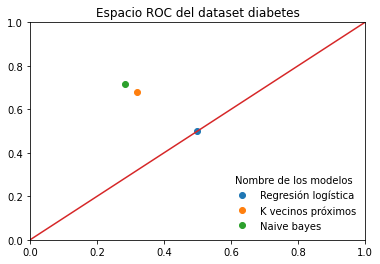

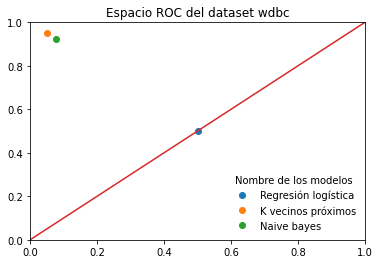

In [19]:
wdbc = Datos('./ConjuntoDatos/wdbc.csv')
diabetes = Datos('./ConjuntoDatos/pima-indians-diabetes.csv')
iteraciones = 50

datasets = {'diabetes': diabetes, 'wdbc': wdbc}
# Validacion simple con 10 iteraciones
vs = ValidacionSimple(0.30, 1)

rlog = ClasificadorRegresionLogistica()
de = DistanciaEuclidea()
knn = ClasificadorVecinosProximos(k=11, distancia=de)
nb = ClasificadorNaiveBayes()

clasificadores = {"Regresión logística":rlog, "K vecinos próximos":knn, "Naive bayes":nb}

for (k_dataset, v_dataset) in datasets.items():
    for (k_clasificador, v_clasificador) in clasificadores.items():
        ROCpoint = np.array([0, 0])
        for i in range(iteraciones):
            ROCpoint = ROCpoint + np.array(v_clasificador.espacioROC(particionado=vs, dataset=v_dataset))
        plt.plot(ROCpoint[1]/iteraciones,ROCpoint[0]/iteraciones, 'o', label=k_clasificador)
    plt.title("Espacio ROC del dataset "+k_dataset)
    plt.plot(np.linspace(0, 1, 5), np.linspace(0, 1, 5))
    plt.legend(loc="lower right", title="Nombre de los modelos", frameon=False)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()
